In [1]:
%load_ext autoreload
%autoreload 2
%cd '/home/xingyu/Projects/PlasticineLab'
%pwd

from plb.envs import make
from imitation.default_argument import get_args
from plb.engine.taichi_env import TaichiEnv
from plb.optimizer.solver import Solver
from plb.algorithms.logger import Logger


device = 'cuda'

log_dir = './data/connect'
args = get_args("")

obs_channel = len(args.img_mode)
img_obs_shape = (args.image_dim, args.image_dim, obs_channel)

args.env_name ='LiftSpread-v1'
env = make(args.env_name)
env.seed(args.seed)
taichi_env: TaichiEnv = env.unwrapped.taichi_env
T = env._max_episode_steps

/home/xingyu/Projects/PlasticineLab
[Taichi] mode=release
[Taichi] preparing sandbox at /tmp/taichi-d9ybezal
[Taichi] version 0.7.26, llvm 10.0.0, commit e37bdb5e, linux, python 3.8.5
[Taichi] Starting on arch=cuda
[Tina] version 0.1.1
[Tina] Taichi properties hacked
pimirives: num primitive: 3
Building primitive
action:
  dim: 6
  scale: (0.7, 0.005, 0.005, 0.005, 0.0, 0.0)
collision_group: [0.0, 0.0, 0.0]
color: (0.7568, 0.6039, 0.4196)
friction: 0.9
h: 0.3
init_pos: (0.3, 0.25, 0.5)
init_rot: (0.707, 0.707, 0.0, 0.0)
lower_bound: (0.0, 0.16, 0.0)
r: 0.03
shape: RollingPinExt
upper_bound: (1.0, 1.0, 1.0)
variations: None
Building primitive
action:
  dim: 6
  scale: (0.01, 0.01, 0.0, 0.0, 0.0, 0.05)
collision_group: [0, 0, 1]
color: (0.7568, 0.6039, 0.4196)
friction: 50.0
init_pos: (0.65, 0.02, 0.5)
init_rot: (0.707, 0.707, 0.0, 0.0)
lower_bound: (0.0, 0.0, 0.0)
shape: Box
size: (0.1, 0.1, 0.02)
upper_bound: (1.0, 1.0, 1.0)
variations: None
Building primitive
action:
  dim: 0
  scale:

Env reseting to: /home/xingyu/Projects/PlasticineLab/plb/envs/../../datasets/0923_LiftSpread/target/target_0.npy, init v: 100, target v: 0
emd after reset: 0.3295017182826996
======================WARNING: contact loss mask not set================
MoviePy - Building file data/env_modeling/lift.gif with imageio.


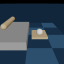

In [2]:
# Generate a lift video
from plb.utils.visualization_utils import save_numpy_as_gif
import numpy as np
filename = 'data/env_modeling/lift.gif'
env.reset(init_v=100, target_v=0)
reset_states = env.get_primitive_state()
frames = []
actions = []
img_size=64
for i in range(10):
    action = np.array([0]* 6 + [-0.5, 1., 0., 0., 0., 0.2])
    env.step(action)
    actions.append(action)
    frames.append(env.taichi_env.render(mode='rgb', img_size=img_size)[:,:,:3])
for i in range(15):
    action = np.array([0]* 6 + [-0.7, 0.8, 0., 0., 0., 0.7])
    env.step(action)
    actions.append(action)
    frames.append(env.taichi_env.render(mode='rgb', img_size=img_size)[:,:,:3])
for i in range(5):
    action = np.array([0]* 6 + [1., 0., 0., 0., 0., 0.])
    env.step(action)
    actions.append(action)
    frames.append(env.taichi_env.render(mode='rgb', img_size=img_size)[:,:,:3])
save_numpy_as_gif(np.array(frames), filename)
demo_actions = np.array(actions)
state = env.get_state()
from IPython.display import Image
Image(filename)

[  3.11876297  -9.00301263   0.           0.           0.
 -19.21503954]
[  2.71876812  -8.60301778   0.           0.           0.
 -16.3045785 ]
[  2.31877327  -8.20302293   0.           0.           0.
 -13.62362556]
[  1.91877842  -7.80302808   0.           0.           0.
 -11.17557645]
[ 1.51878357 -7.40303323  0.          0.          0.         -8.96349352]
[ 1.11878872 -7.00303838  0.          0.          0.         -6.99016733]
[ 0.71879387 -6.60304353  0.          0.          0.         -5.25806436]
[ 0.43127775 -6.20304868  0.          0.          0.         -3.76936484]
[ 0.25877714 -5.80305383  0.          0.          0.         -2.52593395]
[ 0.15526772 -5.40305898  0.          0.          0.         -1.52931589]
[ 0.09316206 -5.00306413  0.          0.          0.         -0.78075776]
[ 0.05588055 -4.60306928  0.          0.          0.         -0.36937112]
[ 0.03354788 -4.20307443  0.          0.          0.         -0.22773357]
[ 0.02013922 -3.80307391  0.          0.  

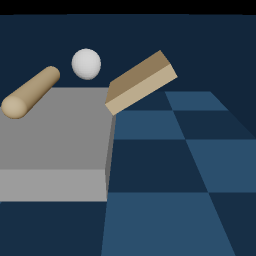

In [30]:
reset_key = {'init_v':100,  'target_v':0, 'contact_loss_mask': [0., 0., 0.]}
env.set_state(state)
from imitation.sampler import sample_traj
actions, obses, _, _ = env.primitive_reset_to(1, reset_states, img_size=256)
save_numpy_as_gif(np.array(obses) * 255., filename)
Image(filename)